In [1]:
import numpy as np
import os, pickle
from itertools import product
import pandas as pd

import sys
sys.path.append('/mnt/disk1/project/SMhospital/capsule/torch/1_modules')
from ce_utils.data import test_data_load
from ce_model.cnn_inf import cnn_model
from ce_utils.cls_eval import cls_metric, extract_score
from ce_utils.cls_eval import get_accuracy_by_type
from ce_utils.cls_eval import plot_roc_curve

# 1. Load data

In [2]:
np_test_name, np_test_X, np_test_Y = test_data_load(filename = 'data_config_total_np_-r-.pkl')

6281
1778


In [3]:
np_test_X.shape

(8059, 3, 512, 512)

# 2. Load model

In [4]:
model_dir = './model/'
gpu_idx = 3

np_total_model = cnn_model(network = 'CNN_v1', n_ch = 3, n_cls = 2, 
                         model_dir = model_dir, model_name = 'np_total', gpu_idx = gpu_idx)

model:
np_total_0.0001_16_2011261248_070_t_accr_0.9704_t_loss_0.342231_v_accr_0.9383_v_loss_0.373987.pt



# 3. Evaluation
## 3.1. Accuracy, Sensitivity ...

In [5]:
np_total_score = extract_score(np_total_model, np_test_X)

model_list = ['total_-r-_--']
score_list = [np_total_score]

df = pd.DataFrame(columns = ['model', 'ACC', 'SEN', 'SPE', 'NPV', 'PPV'])

for i, model, score in zip(range(len(model_list)), model_list, score_list):
    df.loc[i] = [model] + cls_metric(np_test_Y, score).cm2metric()
    
df.to_csv('cls_performance.csv', encoding='utf-8-sig', index = True)  
    
df

8059: 403(*20) |################################################## | 100.0% prediction


,model,ACC,SEN,SPE,NPV,PPV
0,total_-r-_--,93.0,83.75,95.62,95.41,84.41


## 3.2. Accuracy by type

In [6]:
types, accrs = get_accuracy_by_type(np_total_model, np_test_name, np_test_X, np_test_Y, target_category = None)

6281: 315(*20) |################################################## | 100.0% prediction
1778: 89(*20) |################################################## | 100.0% prediction
383: 20(*20) |################################################## | 100.0% prediction
224: 12(*20) |################################################## | 100.0% prediction
4: 1(*20) |################################################## | 100.0% prediction
155: 8(*20) |################################################## | 100.0% prediction
530: 27(*20) |################################################## | 100.0% prediction
237: 12(*20) |################################################## | 100.0% prediction
267: 14(*20) |################################################## | 100.0% prediction
42: 3(*20) |################################################## | 100.0% prediction
169: 9(*20) |################################################## | 100.0% prediction
17: 1(*20) |################################################## | 100.

In [7]:
df1 = pd.DataFrame(columns = ['model'] + types)

accr_list = [accrs]
for i, model, accr in zip(range(len(model_list)), model_list, accr_list):
    df1.loc[i] = [model] + accr
    
df1.to_csv('accuracy_by_type.csv', encoding='utf-8-sig', index = True)  
df1

,model,negative,positive,hemorrhagic,red_spot,angioectasia,active_bleeding,depressed,erosion,ulcer,stricture,protruded,ampulla_of_vater,lymphoid_follicles,small_bowel_tumor,etc,phlebectasia,lymphangiectasia
0,total_-r-_--,95.62,83.75,95.3,91.96,100.0,100.0,91.51,94.09,90.26,83.33,62.13,76.47,62.26,56.52,66.67,42.86,100.0


## 3.3. ROC curve

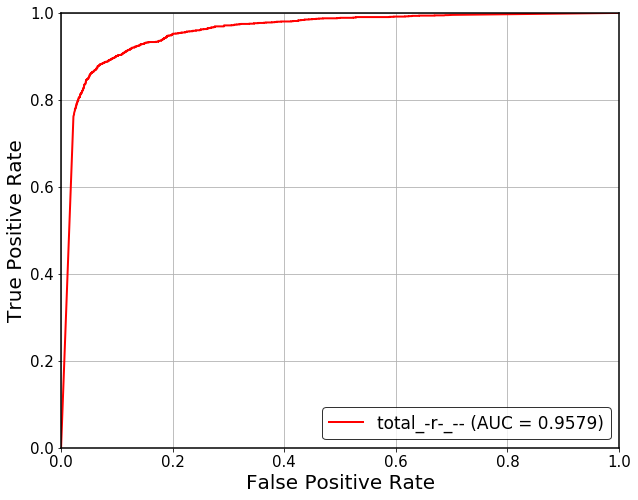

In [8]:
plot_roc_curve(model_list, score_list, np_test_Y)

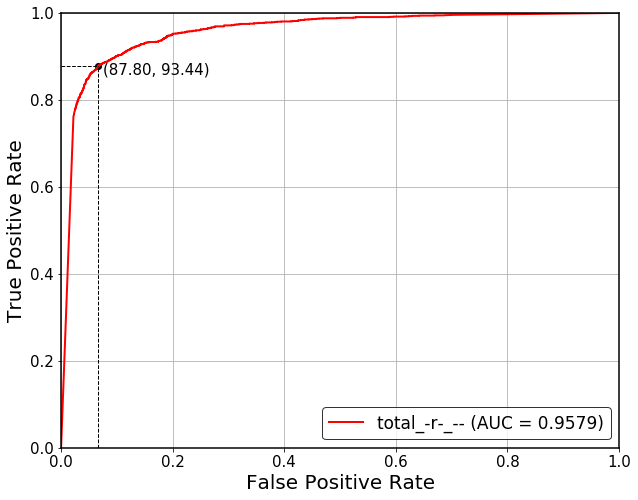

In [9]:
plot_roc_curve(model_list, score_list, np_test_Y, save_dir = '.', optimal_threshold = True)